In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [379]:
asset_id = "EOA-514361720448"
monthYear = "07/2019"
# filePath = r"data_base//Service Events.xlsx"
filePath = r"data_base//temp.xlsx"

In [430]:
df = pd.read_excel(filePath)

df['part_quantity'] = df['part_quantity'].replace(np.nan, 0)
df['visit_date'] = pd.to_datetime(df.visit_date)
df['month_year'] = df.visit_date
df['month_year'] = df['month_year'].dt.strftime('%m/%Y')
df['number_of_visits'] = 1
# df['number_of_visits'] = df.number_of_visits.groupby(pd.Grouper(freq='M')).sum()
df['part_quantity'] = df['part_quantity'].groupby([df.asset_id, df.visit_date]).transform('sum')
df['number_of_visits'] = df['number_of_visits'].groupby([df.asset_id, df.visit_date]).transform('sum')
display()

# df['number_of_visits'] = pd.Series(df['number_of_visits'].groupby(df['visit_date']).aggregate('max').values)

df = df[['asset_id', 'Manufacturer', 'month_year', 'Customer_name', 'Model', 'part_quantity', 'number_of_visits']] #answer question no 1
# sumOfParts = pd.DataFrame(df.number_of_visits.groupby([df.visit_date])).sum()

groupByAssetDate = pd.DataFrame(df.groupby([df.asset_id, df.month_year]).aggregate('min'))
display(groupByAssetDate)





C:\Users\idanor\AppData\Local\Temp\ipykernel_29296\2223546667.py:18: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  groupByAssetDate = pd.DataFrame(df.groupby([df.asset_id, df.month_year]).aggregate('min'))


Customer_name    Model  \
asset_id         month_year                                                 
AIN-652852978562 07/2019                            Schuster Inc  RU-7919   
AJU-808043594602 08/2019                          Fadel and Sons  FR-6802   
CCO-296376706153 07/2019              Koch, Hodkiewicz and Robel  CN-7035   
EOA-514361720448 07/2019                             Deckow-West  RU-7919   
FIC-630184468925 07/2019       Wilderman, Jaskolski and Kshlerin  FR-6802   
GCS-263711823016 08/2019                            Nitzsche LLC  RU-7919   
GSQ-404160262042 07/2019       Christiansen, Adams and Kertzmann  CN-4015   
HVF-181742508493 07/2019                            Bergnaum Inc  FR-6802   
                 09/2019                            Bergnaum Inc  FR-6802   
                 10/2019                            Bergnaum Inc  FR-6802   
                 11/2019                            Bergnaum Inc  FR-6802   
                 12/2019                            Bergnaum Inc  FR-6802   
IBS-216302367563 07/2019                   Bogan, Bruen and Kihn  RU-7919   
IVY-204340175824 11/2019                              Murray Inc  AF-9783   
IXT-612005397607 07/2019                      Wilkinson-Connelly  RU-7919   
                 08/2019                      Wilkinson-Connelly  RU-7919   
                 09/2019                      Wilkinson-Connelly  RU-7919   
                 11/2019                      Wilkinson-Connelly  RU-7919   
KQN-776681383506 07/2019                          Terry-Thompson  CN-3517   
KVU-503510555087 07/2019                Senger, Zemlak and Kiehn  CN-3517   
MIY-038172335422 07/2019                          Gislason-Hayes  CN-6811   
OBG-157108201586 07/2019          Emard, Okuneva and Cruickshank  CN-6811   
OLM-871850937422 07/2019                       Thompson-Anderson  FR-6802   
OYM-716188971316 07/2019                          Collins-Heller  CN-7035   
OZP-080824842459 07/2019        Powlowski, Stiedemann and Deckow  CN-6811   
QGY-644848149790 02/2020                          Boyle and Sons  RU-7919   
                 04/2020                          Boyle and Sons  RU-7919   
                 09/2019                          Boyle and Sons  RU-7919   
                 10/2019                          Boyle and Sons  RU-7919   
                 11/2019                          Boyle and Sons  RU-7919   
TEH-872313054985 07/2019     Turcotte, Rutherford and Konopelski  FR-6802   
                 08/2019     Turcotte, Rutherford and Konopelski  FR-6802   
TKW-212051102807 02/2020        Konopelski, Howell and Rosenbaum  BR-5214   
UHV-622160184297 07/2019                              Herman LLC  RU-7919   
UZE-424937766294 01/2020                            Nitzsche LLC  FR-6802   
                 09/2019                            Nitzsche LLC  FR-6802   
                 11/2019                            Nitzsche LLC  FR-6802   
VHG-942555828367 07/2019             Koelpin, Spencer and Hamill  BR-5214   
VUX-597284854888 07/2019                               Berge Inc  CN-7035   
VZM-606202900354 07/2019                  Rowe, Fahey and Hudson  CN-6811   
WZZ-006916492168 07/2019              Pacocha, Lakin and Kuvalis  CN-7035   
XIT-321440785994 07/2019     Turcotte, Rutherford and Konopelski  CN-8439   
                 08/2019     Turcotte, Rutherford and Konopelski  CN-8439   
ZGE-886287318234 07/2019                            Funk-Zboncak  CN-6811   

                             part_quantity  number_of_visits  
asset_id         month_year                                   
AIN-652852978562 07/2019               1.0               5.0  
AJU-808043594602 08/2019               1.0               1.0  
CCO-296376706153 07/2019               0.0               2.0  
EOA-514361720448 07/2019               0.0               1.0  
FIC-630184468925 07/2019               0.0               2.0  
GCS-263711823016 08/2019               1.0               1.0  
GSQ-

In [426]:
display(df.month_year.dt.to_period('M'))

0      2019-07
1      2019-07
2      2019-07
3      2019-08
4      2019-08
        ...   
139    2019-07
140    2019-07
141        NaT
142    2019-07
143    2019-07
Name: month_year, Length: 144, dtype: period[M]

asset_id                    object
Manufacturer                object
month_year                  object
visit_date          datetime64[ns]
Customer_name               object
Model                       object
part_quantity              float64
number_of_visits           float64
dtype: object

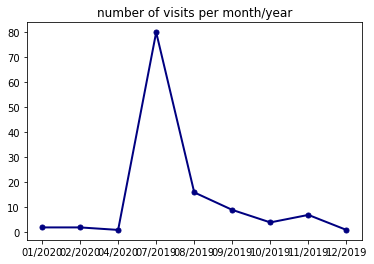

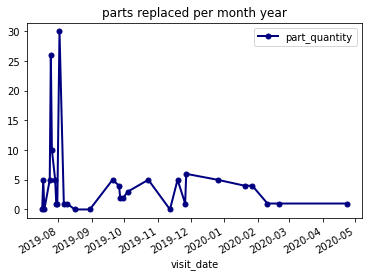

In [410]:
numOfVisitsPerMonthYear = df.month_year.value_counts().sort_index()
partQuanPerMonthYear = pd.DataFrame(df.groupby(df.visit_date)['part_quantity'].sum())

numOfVisitsPerMonthYear.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='number of visits per month/year')
partQuanPerMonthYear.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='parts replaced per month year')
df.dtypes
